In [1]:
import os

import numpy as np
from sklearn.decomposition import PCA

import matplotlib
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

from utils import load_hidden_representations_from_hdf5, read_templates_from_file

----

In [2]:
# params
log_dir = "/logfiles"
model = "bigscience-T0"
module = "decoder"
task = "rte"

In [3]:
# assertions
assert model == "bigscience-T0"
assert module == "decoder"
assert task == "rte"

## Prompts

In [4]:
df = read_templates_from_file(f"/t0-analysis/prompts/{task}/all.csv")
# df = read_templates_from_file(f"/t0-analysis/prompts/{task}/fixed_prompt.csv")
# df = read_templates_from_file(f"/t0-analysis/prompts/{task}/fixed_target_yes_no.csv")
display(df)

name  \
0                gpt_3_yes_no_with_targets   
1            mnli_crowdsource_with_targets   
2   based_on_previous_passage_with_targets   
3                       infer_with_targets   
4                      follow_with_targets   
5                       imply_with_targets   
6                  guaranteed_with_targets   
7                   justified_with_targets   
8                must_be_true_with_targets   
9               should_assume_with_targets   
10           gpt_3_true_false_with_targets   
11              gpt_3_cat_dog_with_targets   
12            gpt_3_yes_no_without_targets   

                                             template     category  \
0         {premise} Question: {hypothesis} Yes or No?  instructive   
1   {premise} Using only the above description and...  instructive   
2   {premise} Based on the previous passage, is it...  instructive   
3   Suppose {premise} Can we infer that "{hypothes...  instructive   
4   Given that {premise} Does it follow that {hypo...  instructive   
5   {premise} Question: Does this imply that "{hyp...  instructive   
6   Given {premise} Is it guaranteed true that "{h...  instructive   
7   {premise} Are we justified in saying that "{hy...  instructive   
8   Given that {premise} Therefore, it must be tru...  instructive   
9   Given {premise} Should we assume that "{hypoth...  instructive   
10    {premise} Question: {hypothesis} True or False?  instructive   
11       {premise} Question: {hypothesis} Cat or Dog?  instructive   
12                  {premise} Question: {hypothesis}?  instructive   

    includes_targets      targets target_ids  shuffle  
0               True    ▁Yes, ▁No       0, 1    False  
1               True    ▁Yes, ▁No       0, 1    False  
2               True    ▁Yes, ▁No       0, 1    False  
3               True    ▁Yes, ▁No       0, 1    False  
4               True    ▁Yes, ▁No       0, 1    False  
5               True    ▁Yes, ▁No       0, 1    False  
6               True    ▁Yes, ▁No       0, 1    False  
7               True    ▁Yes, ▁No       0, 1    False  
8               True    ▁Yes, ▁No       0, 1    False  
9               True    ▁Yes, ▁No       0, 1    False  
10              True  ▁True, ▁Fal       0, 1    False  
11              True   ▁Cat, ▁Dog       0, 1    False  
12             False    ▁Yes, ▁No       0, 1    False

## PCA

In [5]:
def unison_shuffled_copies(a, b):
    # from: https://stackoverflow.com/questions/4601373/better-way-to-shuffle-two-numpy-arrays-in-unison
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [8]:
use_pattern = [
    "gpt_3_yes_no_with_targets",
    # "mnli_crowdsource_with_targets",
    # "based_on_previous_passage_with_targets",
    "infer_with_targets",
    # "follow_with_targets",
    # "imply_with_targets",
    # "guaranteed_with_targets",
    # "justified_with_targets",
    # "must_be_true_with_targets",
    # "should_assume_with_targets",
    "gpt_3_true_false_with_targets",
    "gpt_3_cat_dog_with_targets",
    "gpt_3_yes_no_without_targets",
]

In [9]:
for t in range(2):
# for t in range(1):
    # for layer in range(0, 2):
    for layer in range(0, 25):
    # for layer in range(24, 25):
        print(f"token: {t}\tlayer: {layer}")
        file_names, prompt_names = [], []

        for _, row in df.iterrows():
            if row['name'] in use_pattern:
                file_names.append(f"{task}/{model}/{module}/{row['name']}/hidden_represenations_t{t}_layer{layer}_avg.hdf5",)
                prompt_names.append(row['name'])


        # load hidden representations from hdf5 file
        representations = None
        classes = []
        n_sequences = 0

        for idx, file_name in enumerate(file_names):
            hidden_representations = load_hidden_representations_from_hdf5(os.path.join(log_dir, file_name))
            # print(hidden_representations.shape)
            n_sequences = hidden_representations.shape[0]

            if representations is None:
                representations = hidden_representations
            else:
                representations = np.concatenate((representations, hidden_representations), axis=0)

            classes += n_sequences * [idx] # assign representations to classes
        
        classes = np.asarray(classes)

        X, y = representations, classes
        # shuffle representations and classes
        # X, y = unison_shuffled_copies(representations, classes)
        print(X.shape, y.shape)

        # perform PCA on hidden representations
        print('PCA for prompts:', prompt_names)

        for n_components in range(2, 3):
            pca = PCA(n_components=n_components)
            pca.fit(X)

            # variance explained by each of the principal components
            print(f"model:{model}; module:{module}; token:{t}; layer:{layer}; n_components: {n_components}; variance explained: {pca.explained_variance_ratio_}")
            print(np.sum(pca.explained_variance_ratio_))
        print('\n')


token: 0	layer: 0


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 4750.33it/s]
/opt/conda/lib/python3.6/site-packages/sklearn/decomposition/_pca.py:555: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:0; layer:0; n_components: 2; variance explained: [nan nan]
nan


token: 0	layer: 1


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5715.01it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:0; layer:1; n_components: 2; variance explained: [0.92020756 0.01288078]
0.93308836


token: 0	layer: 2


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5707.43it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:0; layer:2; n_components: 2; variance explained: [0.92696553 0.03597686]
0.96294236


token: 0	layer: 3


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 6008.10it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:0; layer:3; n_components: 2; variance explained: [0.95851606 0.01441907]
0.97293514


token: 0	layer: 4


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5878.92it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:0; layer:4; n_components: 2; variance explained: [0.9701495  0.00974335]
0.97989285


token: 0	layer: 5


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5741.14it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:0; layer:5; n_components: 2; variance explained: [0.96899384 0.00944564]
0.9784395


token: 0	layer: 6


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5946.87it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:0; layer:6; n_components: 2; variance explained: [0.9760647  0.00701329]
0.983078


token: 0	layer: 7


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 6034.69it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:0; layer:7; n_components: 2; variance explained: [0.99145246 0.00287174]
0.9943242


token: 0	layer: 8


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5910.66it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:0; layer:8; n_components: 2; variance explained: [0.991964   0.00203364]
0.99399763


token: 0	layer: 9


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 6036.47it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:0; layer:9; n_components: 2; variance explained: [0.9921444  0.00184008]
0.99398446


token: 0	layer: 10


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5942.31it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:0; layer:10; n_components: 2; variance explained: [0.9923042  0.00171361]
0.99401784


token: 0	layer: 11


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5972.21it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:0; layer:11; n_components: 2; variance explained: [0.99258786 0.00167541]
0.9942633


token: 0	layer: 12


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 6141.39it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:0; layer:12; n_components: 2; variance explained: [0.9927282  0.00166313]
0.9943913


token: 0	layer: 13


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 6163.35it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:0; layer:13; n_components: 2; variance explained: [0.9896382  0.00161455]
0.9912528


token: 0	layer: 14


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 6037.95it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:0; layer:14; n_components: 2; variance explained: [0.989431   0.00163993]
0.9910709


token: 0	layer: 15


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5867.94it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:0; layer:15; n_components: 2; variance explained: [0.98829514 0.00176208]
0.99005723


token: 0	layer: 16


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5896.71it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:0; layer:16; n_components: 2; variance explained: [0.9800823  0.00500226]
0.98508453


token: 0	layer: 17


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5126.09it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:0; layer:17; n_components: 2; variance explained: [0.97835    0.00464086]
0.98299086


token: 0	layer: 18


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5843.97it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:0; layer:18; n_components: 2; variance explained: [0.9135284  0.01396681]
0.9274952


token: 0	layer: 19


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5859.44it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:0; layer:19; n_components: 2; variance explained: [0.74439186 0.03081335]
0.7752052


token: 0	layer: 20


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 6087.52it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:0; layer:20; n_components: 2; variance explained: [0.57432646 0.07526764]
0.64959407


token: 0	layer: 21


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 6030.02it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:0; layer:21; n_components: 2; variance explained: [0.5410217  0.08251454]
0.6235362


token: 0	layer: 22


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 6082.55it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:0; layer:22; n_components: 2; variance explained: [0.60926133 0.06561631]
0.67487764


token: 0	layer: 23


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 6066.29it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:0; layer:23; n_components: 2; variance explained: [0.6069016  0.06677723]
0.6736788


token: 0	layer: 24


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5863.44it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:0; layer:24; n_components: 2; variance explained: [0.86843157 0.02858543]
0.897017


token: 1	layer: 0


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5847.06it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:1; layer:0; n_components: 2; variance explained: [0.2894984  0.23818646]
0.52768487


token: 1	layer: 1


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 6111.44it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:1; layer:1; n_components: 2; variance explained: [0.29469526 0.24279968]
0.53749496


token: 1	layer: 2


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5556.59it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:1; layer:2; n_components: 2; variance explained: [0.32123354 0.23838234]
0.55961585


token: 1	layer: 3


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 6025.08it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:1; layer:3; n_components: 2; variance explained: [0.5250032  0.16333416]
0.6883373


token: 1	layer: 4


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 6115.50it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:1; layer:4; n_components: 2; variance explained: [0.7335537  0.08754188]
0.8210956


token: 1	layer: 5


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5922.98it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:1; layer:5; n_components: 2; variance explained: [0.8061551  0.06129153]
0.8674466


token: 1	layer: 6


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5896.41it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:1; layer:6; n_components: 2; variance explained: [0.85754937 0.04496208]
0.9025115


token: 1	layer: 7


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5805.22it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:1; layer:7; n_components: 2; variance explained: [0.9112628  0.02703617]
0.938299


token: 1	layer: 8


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5870.25it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:1; layer:8; n_components: 2; variance explained: [0.92352873 0.02321036]
0.9467391


token: 1	layer: 9


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5929.87it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:1; layer:9; n_components: 2; variance explained: [0.9326639  0.02207538]
0.9547393


token: 1	layer: 10


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5993.87it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:1; layer:10; n_components: 2; variance explained: [0.93732023 0.02039189]
0.9577121


token: 1	layer: 11


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 6016.75it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:1; layer:11; n_components: 2; variance explained: [0.9340915 0.0221207]
0.9562122


token: 1	layer: 12


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5627.54it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:1; layer:12; n_components: 2; variance explained: [0.9213963 0.0266637]
0.94806004


token: 1	layer: 13


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 6035.41it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:1; layer:13; n_components: 2; variance explained: [0.8958433  0.03431206]
0.9301554


token: 1	layer: 14


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5823.09it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:1; layer:14; n_components: 2; variance explained: [0.8806179  0.03666499]
0.9172829


token: 1	layer: 15


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 6049.61it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:1; layer:15; n_components: 2; variance explained: [0.839791   0.04710298]
0.886894


token: 1	layer: 16


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5921.95it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:1; layer:16; n_components: 2; variance explained: [0.75726247 0.06629395]
0.8235564


token: 1	layer: 17


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5677.53it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:1; layer:17; n_components: 2; variance explained: [0.6375434  0.09278783]
0.7303312


token: 1	layer: 18


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5793.70it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:1; layer:18; n_components: 2; variance explained: [0.55867976 0.10833516]
0.6670149


token: 1	layer: 19


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 4143.17it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:1; layer:19; n_components: 2; variance explained: [0.50046754 0.11591694]
0.6163845


token: 1	layer: 20


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5134.29it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:1; layer:20; n_components: 2; variance explained: [0.5237453  0.10814143]
0.6318867


token: 1	layer: 21


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5399.25it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:1; layer:21; n_components: 2; variance explained: [0.4731149  0.10988396]
0.5829989


token: 1	layer: 22


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5097.21it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:1; layer:22; n_components: 2; variance explained: [0.25496933 0.18129826]
0.43626758


token: 1	layer: 23


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5745.22it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:1; layer:23; n_components: 2; variance explained: [0.43769798 0.13481386]
0.57251185


token: 1	layer: 24


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5651.05it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
model:bigscience-T0; module:decoder; token:1; layer:24; n_components: 2; variance explained: [0.7541589  0.10811504]
0.86227393




## Visualize PCA

token: 0	layer: 0


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5407.22it/s]
/opt/conda/lib/python3.6/site-packages/sklearn/decomposition/_pca.py:555: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:0; layer:0; n_components: 2; variance explained: [nan nan]
nan


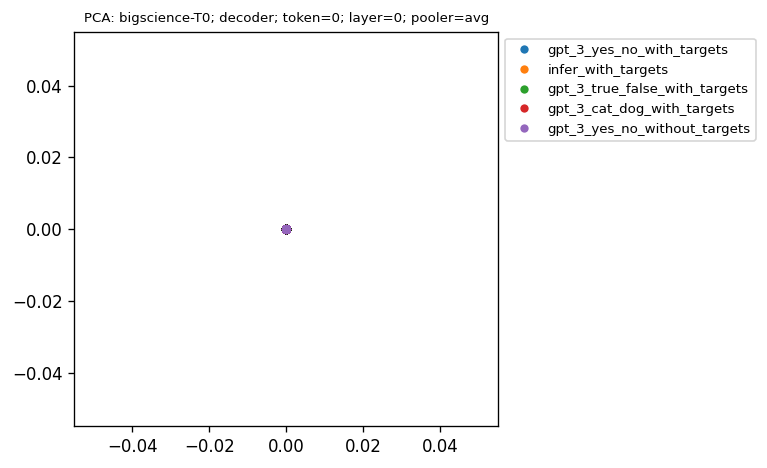



token: 0	layer: 1


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5734.02it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:0; layer:1; n_components: 2; variance explained: [0.9202074  0.01288079]
0.9330882


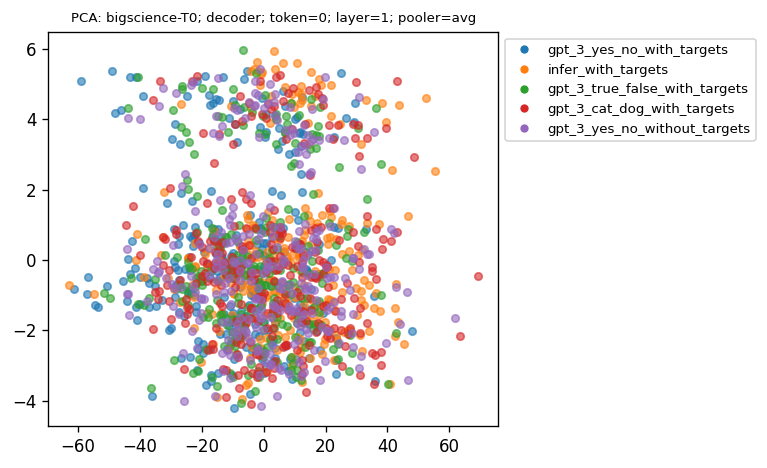



token: 0	layer: 2


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5539.11it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:0; layer:2; n_components: 2; variance explained: [0.9269653  0.03597682]
0.9629421


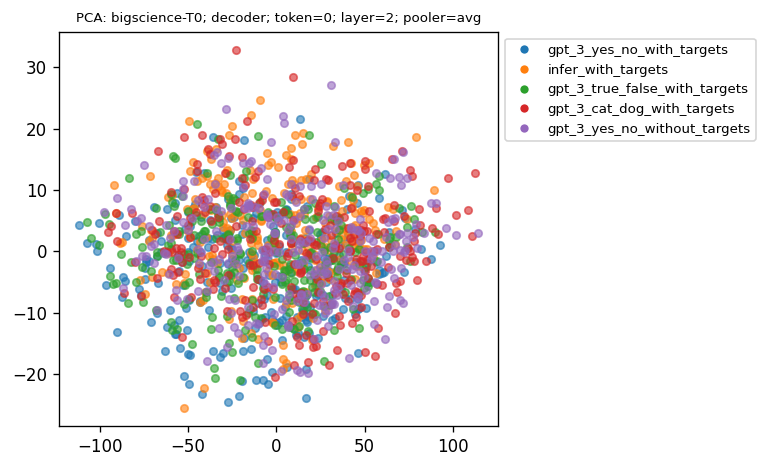



token: 0	layer: 3


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5605.25it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:0; layer:3; n_components: 2; variance explained: [0.958516   0.01441908]
0.9729351


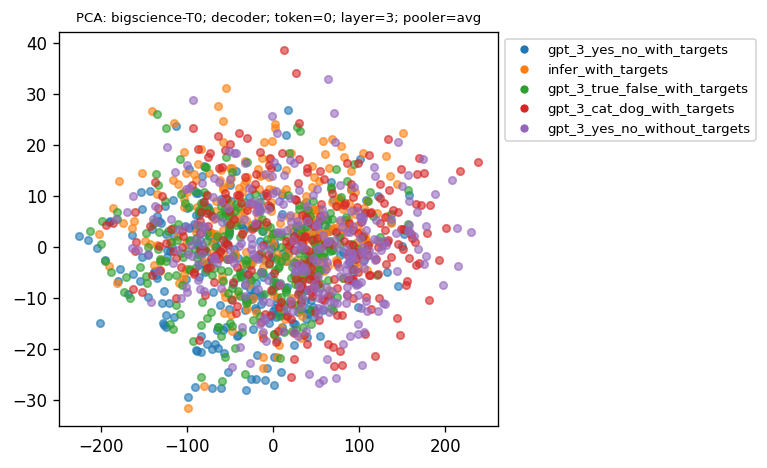



token: 0	layer: 4


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5863.97it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:0; layer:4; n_components: 2; variance explained: [0.9701495  0.00974335]
0.97989285


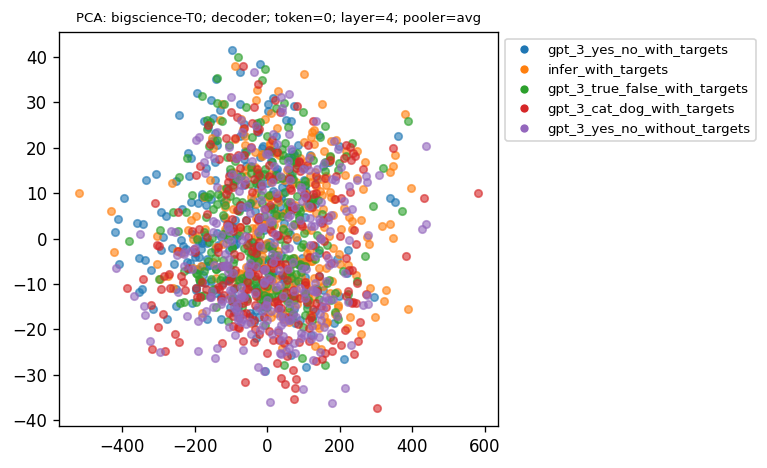



token: 0	layer: 5


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5664.61it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:0; layer:5; n_components: 2; variance explained: [0.9689936  0.00944564]
0.9784393


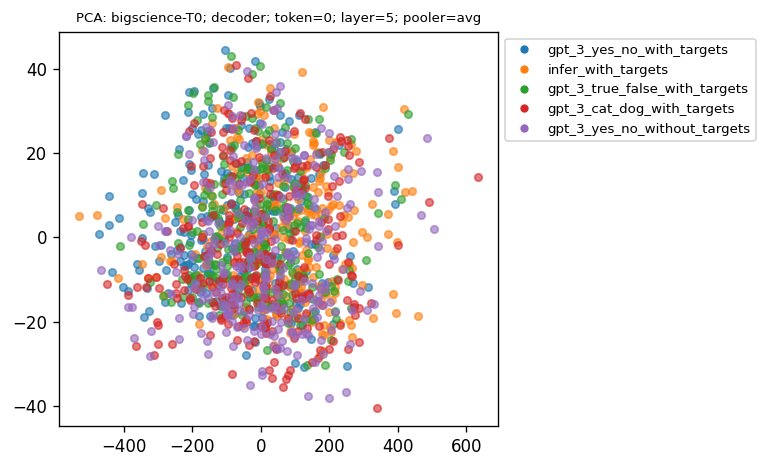



token: 0	layer: 6


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 4884.75it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:0; layer:6; n_components: 2; variance explained: [0.9760647  0.00701328]
0.98307794


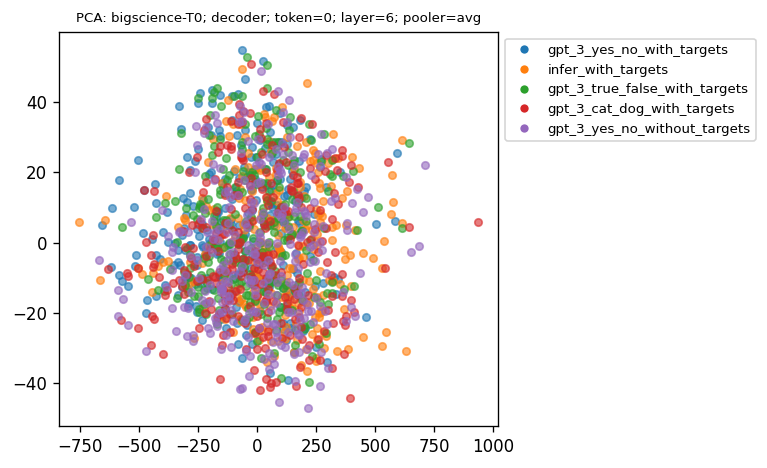



token: 0	layer: 7


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 4683.92it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:0; layer:7; n_components: 2; variance explained: [0.99145246 0.00287174]
0.9943242


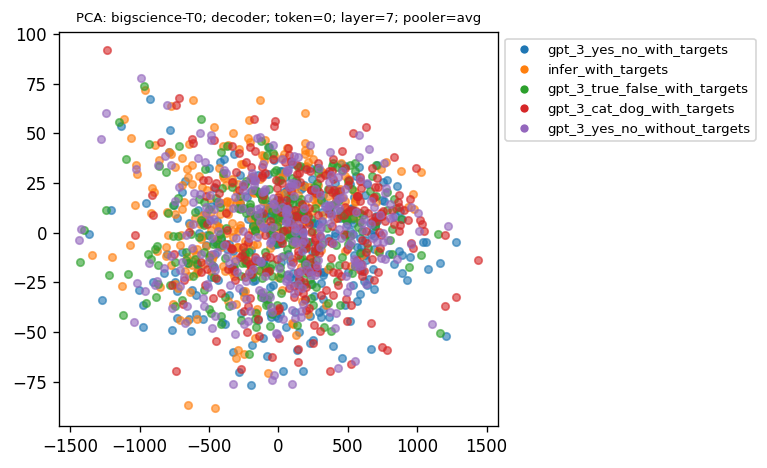



token: 0	layer: 8


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5895.15it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:0; layer:8; n_components: 2; variance explained: [0.991964   0.00203364]
0.99399763


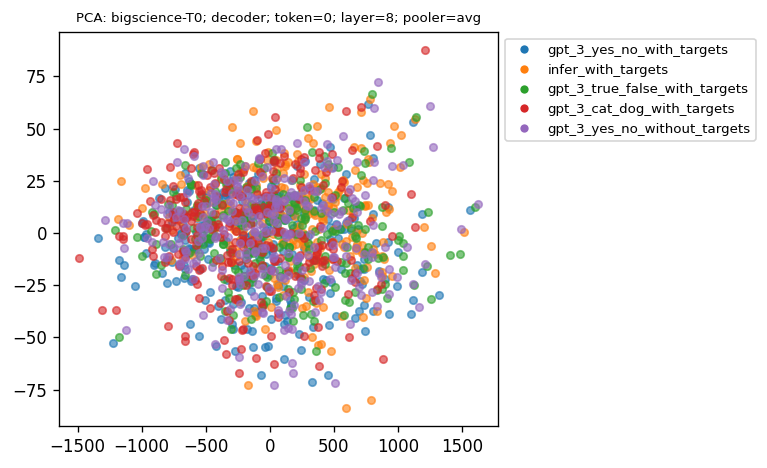



token: 0	layer: 9


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5450.19it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:0; layer:9; n_components: 2; variance explained: [0.9921444  0.00184008]
0.99398446


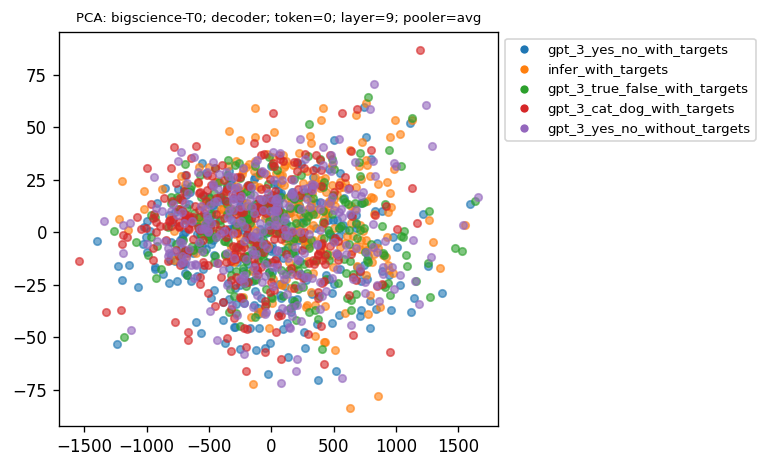



token: 0	layer: 10


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 6009.75it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:0; layer:10; n_components: 2; variance explained: [0.9923042  0.00171361]
0.99401784


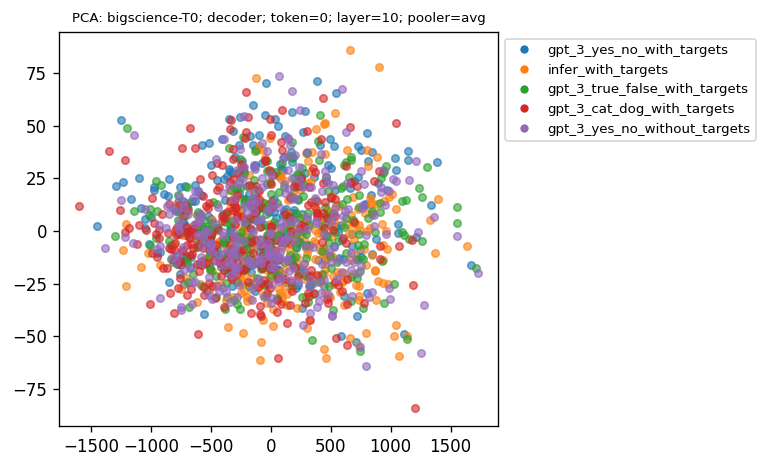



token: 0	layer: 11


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5903.06it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:0; layer:11; n_components: 2; variance explained: [0.99258786 0.00167541]
0.9942633


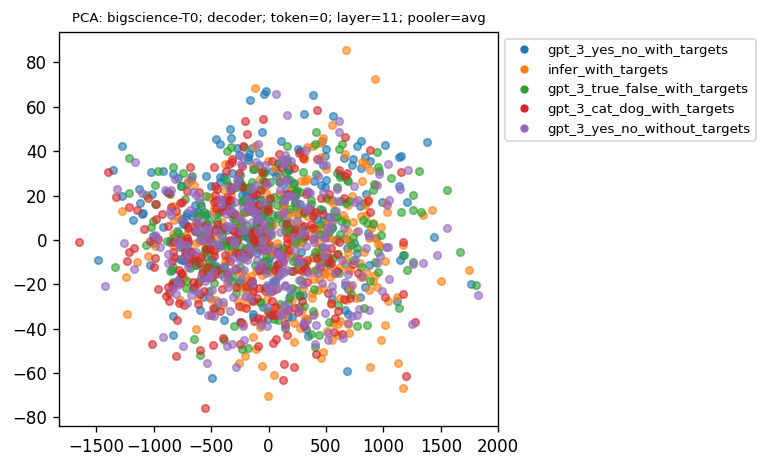



token: 0	layer: 12


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5828.11it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:0; layer:12; n_components: 2; variance explained: [0.9927282  0.00166313]
0.9943913


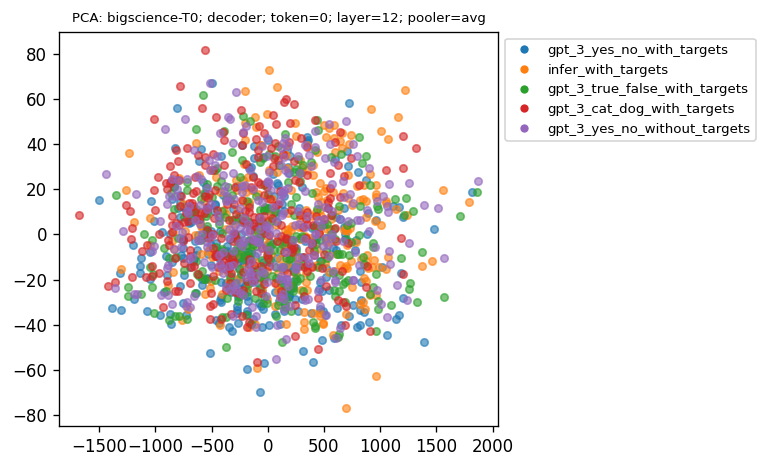



token: 0	layer: 13


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5834.93it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:0; layer:13; n_components: 2; variance explained: [0.9896382  0.00161455]
0.9912528


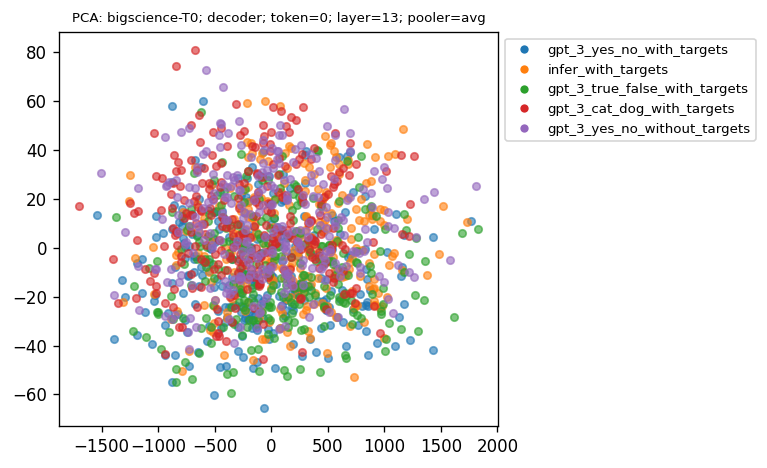



token: 0	layer: 14


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5725.41it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:0; layer:14; n_components: 2; variance explained: [0.9894312  0.00163993]
0.99107116


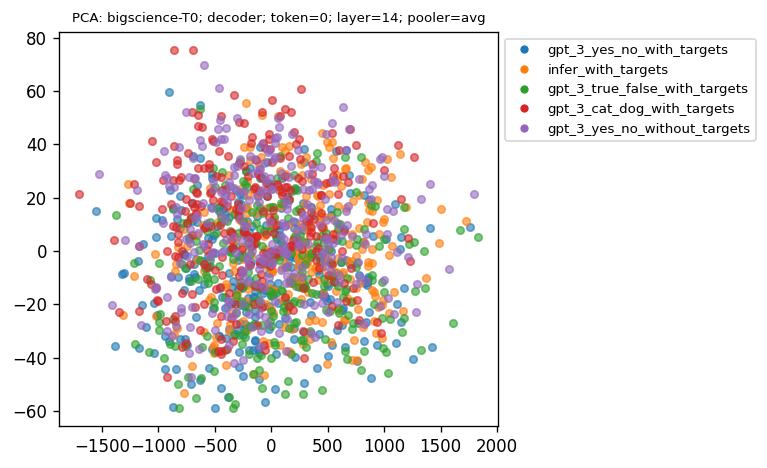



token: 0	layer: 15


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5745.51it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:0; layer:15; n_components: 2; variance explained: [0.98829514 0.00176208]
0.99005723


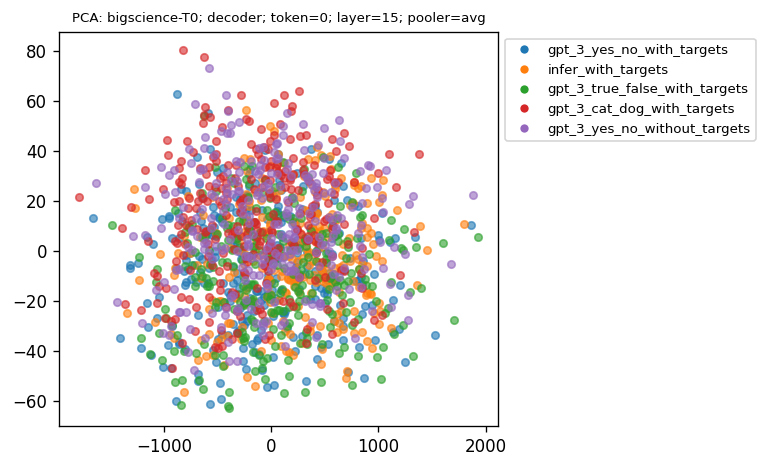



token: 0	layer: 16


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5178.31it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:0; layer:16; n_components: 2; variance explained: [0.9800823  0.00500225]
0.98508453


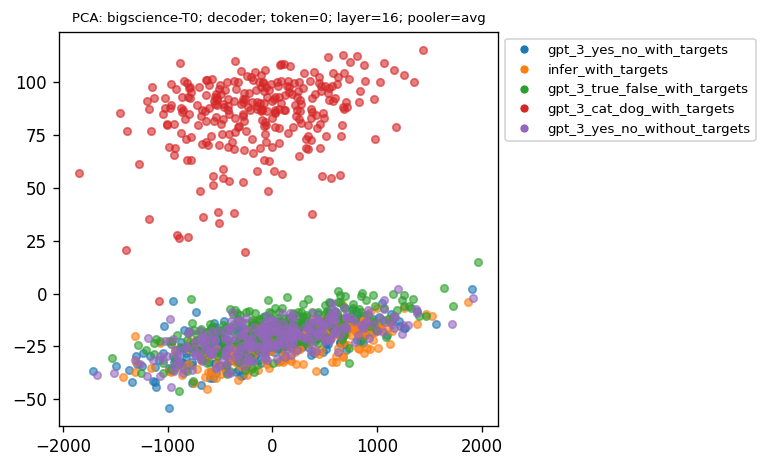



token: 0	layer: 17


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 4787.49it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:0; layer:17; n_components: 2; variance explained: [0.97835    0.00464086]
0.98299086


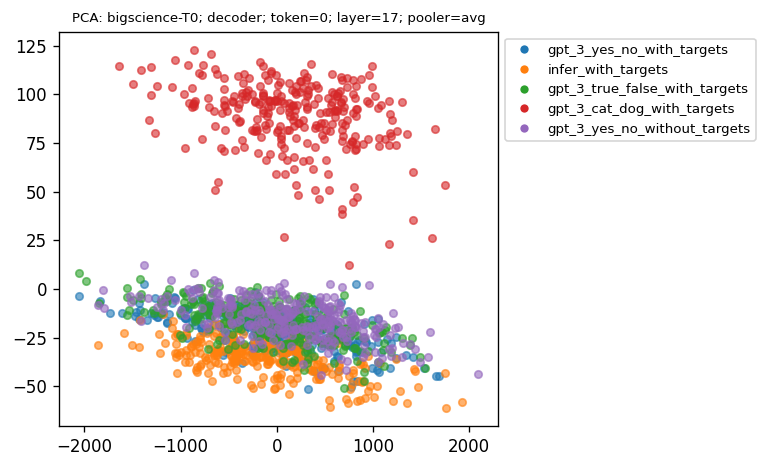



token: 0	layer: 18


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5752.79it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:0; layer:18; n_components: 2; variance explained: [0.9135284 0.0139668]
0.9274952


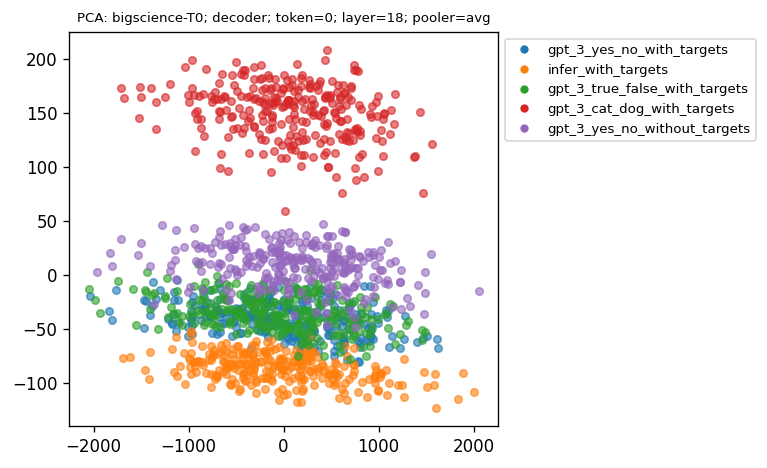



token: 0	layer: 19


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5508.93it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:0; layer:19; n_components: 2; variance explained: [0.744392   0.03081333]
0.7752053


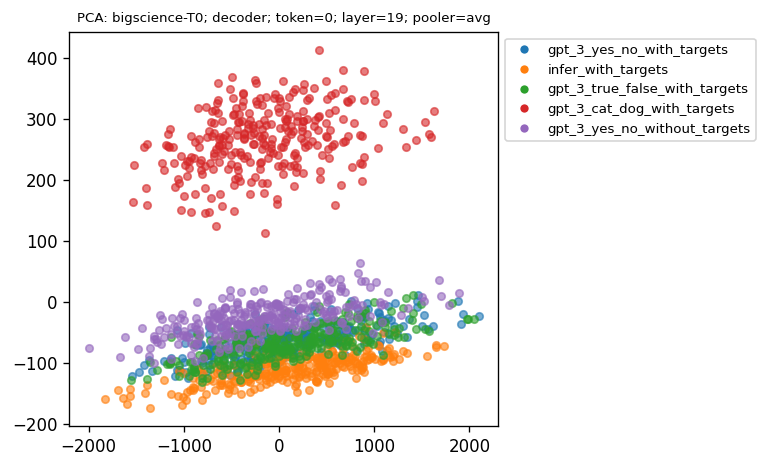



token: 0	layer: 20


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5565.51it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:0; layer:20; n_components: 2; variance explained: [0.57432646 0.07526764]
0.64959407


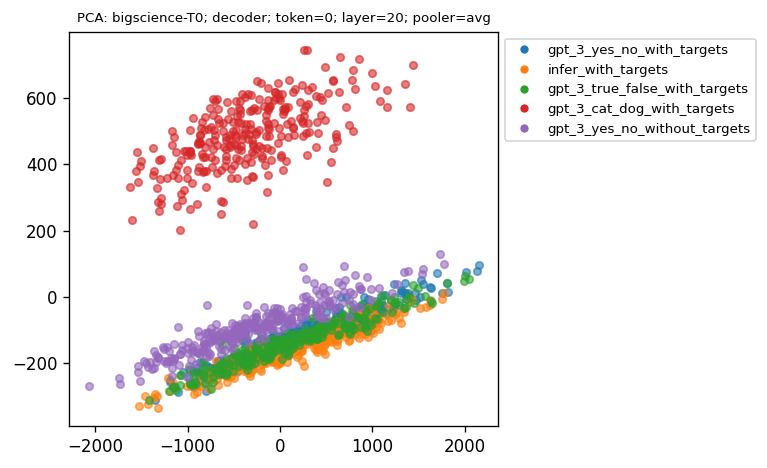



token: 0	layer: 21


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5869.54it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:0; layer:21; n_components: 2; variance explained: [0.5410217  0.08251449]
0.6235362


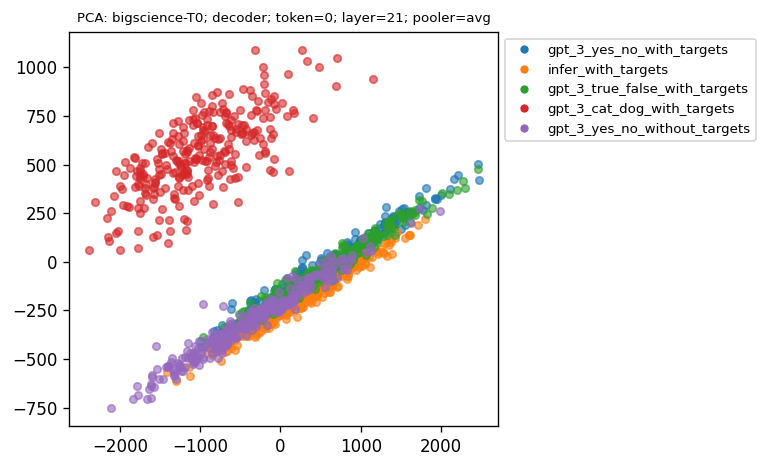



token: 0	layer: 22


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5831.83it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:0; layer:22; n_components: 2; variance explained: [0.60926133 0.06561637]
0.6748777


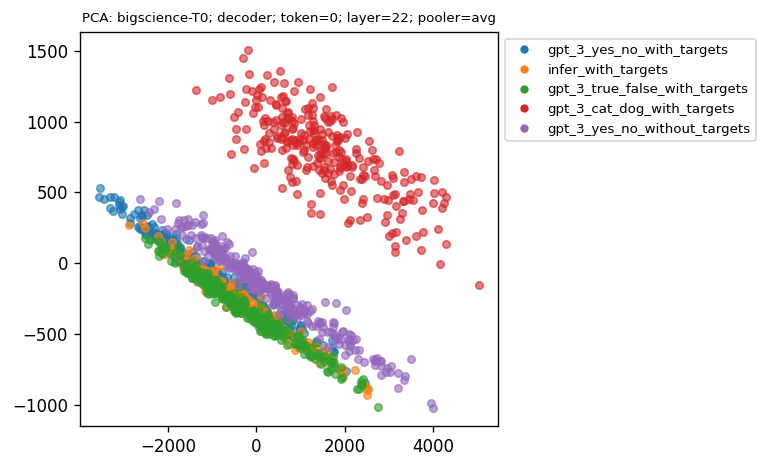



token: 0	layer: 23


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5047.96it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:0; layer:23; n_components: 2; variance explained: [0.60690165 0.06677726]
0.6736789


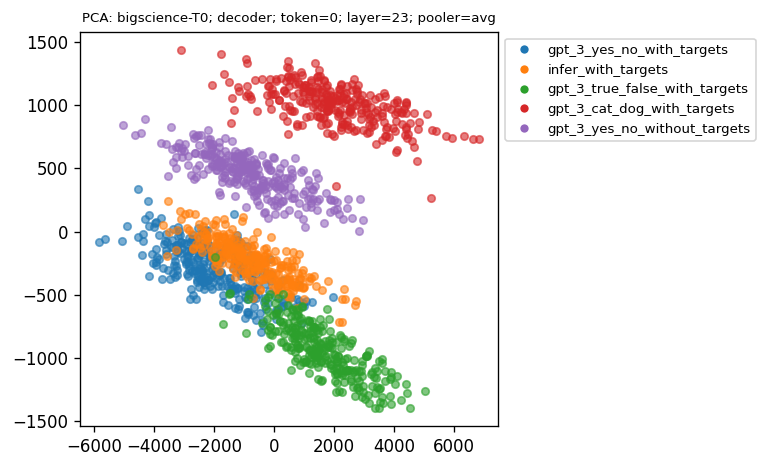



token: 0	layer: 24


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5974.39it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:0; layer:24; n_components: 2; variance explained: [0.86843157 0.02858544]
0.897017


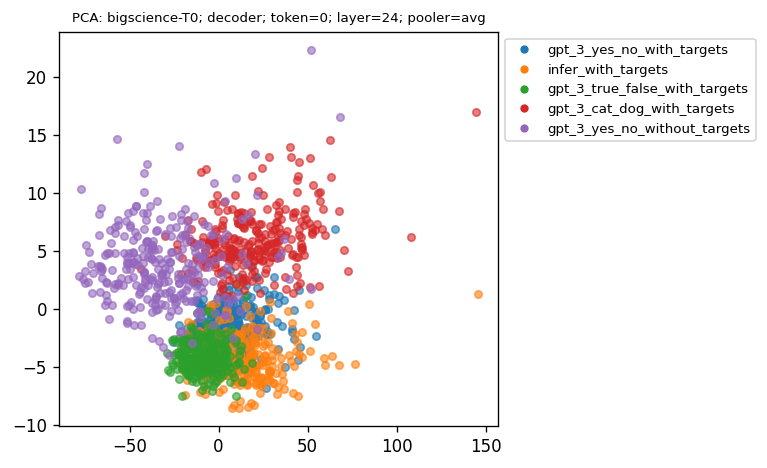



token: 1	layer: 0


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 4622.92it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:1; layer:0; n_components: 2; variance explained: [0.2894984  0.23818631]
0.5276847


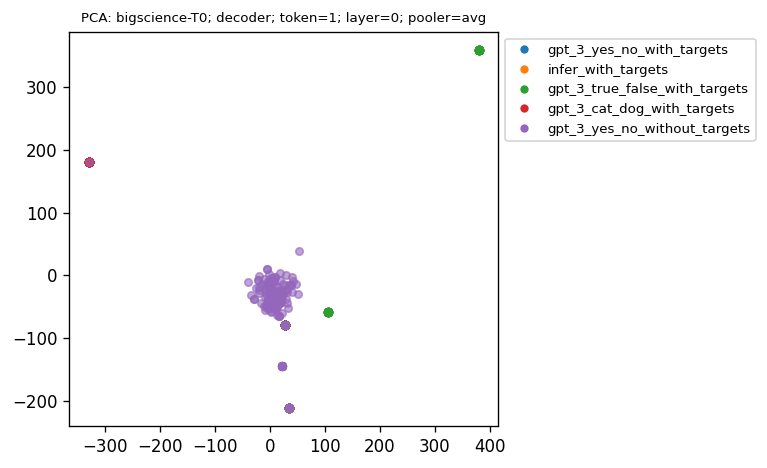



token: 1	layer: 1


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 6011.21it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:1; layer:1; n_components: 2; variance explained: [0.29469535 0.24279957]
0.5374949


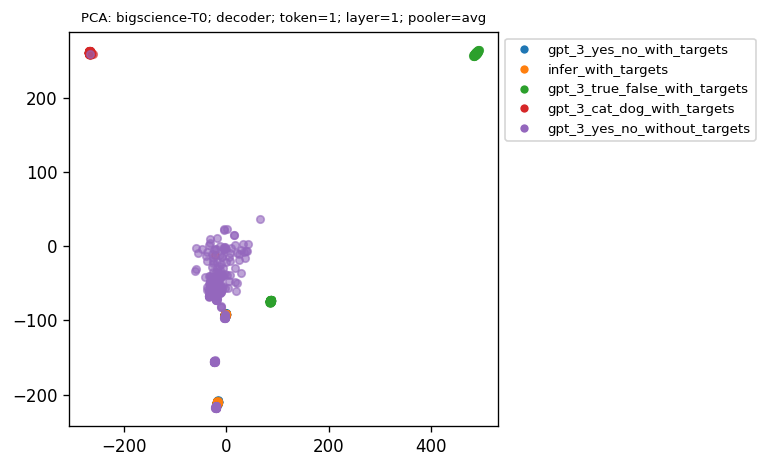



token: 1	layer: 2


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5540.32it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:1; layer:2; n_components: 2; variance explained: [0.32123345 0.23838219]
0.5596156


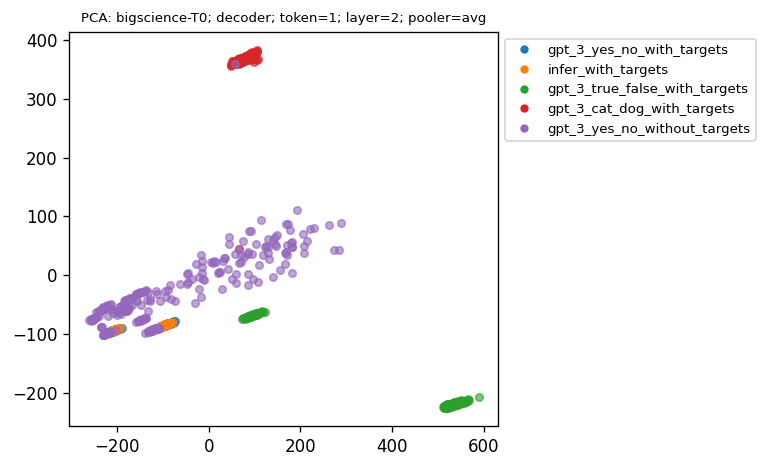



token: 1	layer: 3


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5929.03it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:1; layer:3; n_components: 2; variance explained: [0.52500325 0.1633342 ]
0.68833745


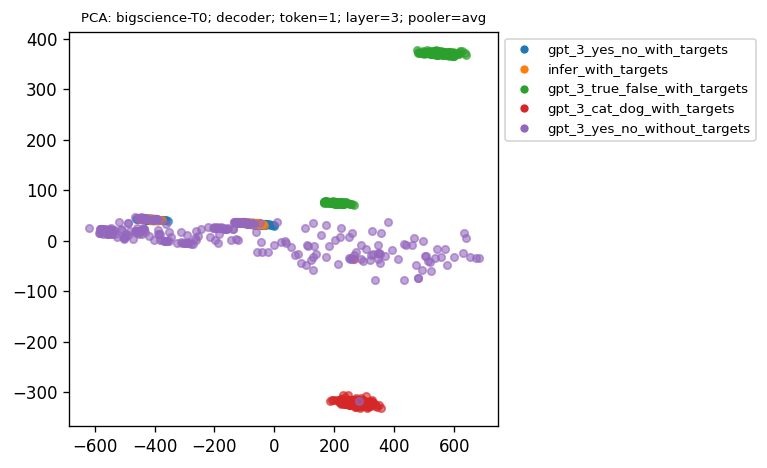



token: 1	layer: 4


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5706.54it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:1; layer:4; n_components: 2; variance explained: [0.7335538  0.08754182]
0.82109565


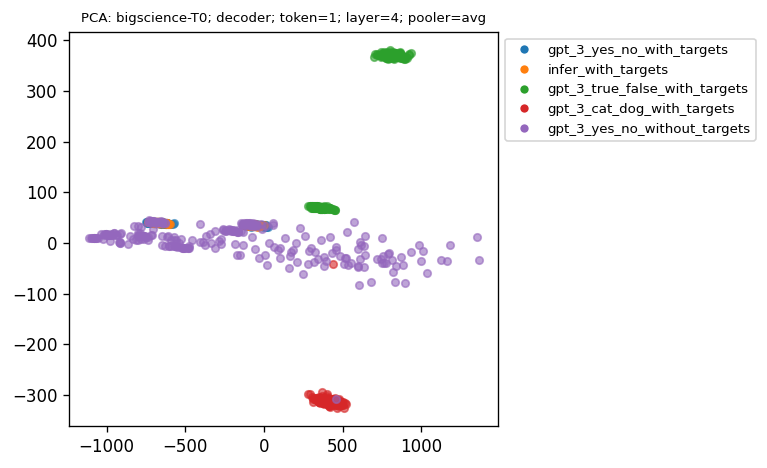



token: 1	layer: 5


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5964.49it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:1; layer:5; n_components: 2; variance explained: [0.80615526 0.06129154]
0.8674468


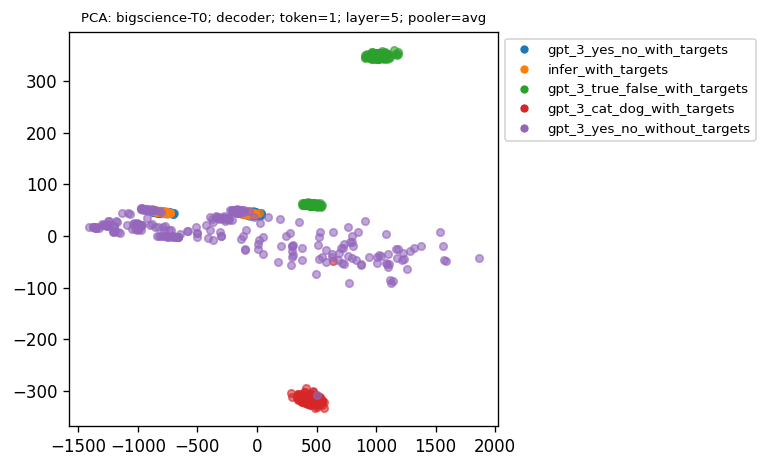



token: 1	layer: 6


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5915.98it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:1; layer:6; n_components: 2; variance explained: [0.85754937 0.04496208]
0.9025115


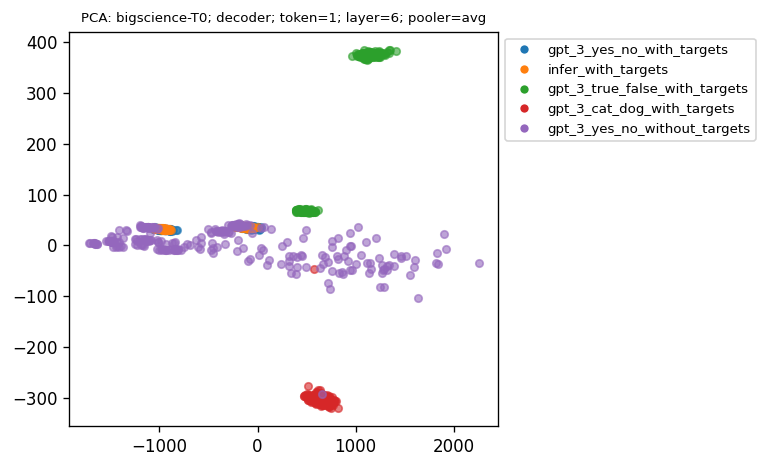



token: 1	layer: 7


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5830.01it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:1; layer:7; n_components: 2; variance explained: [0.9112628  0.02703618]
0.938299


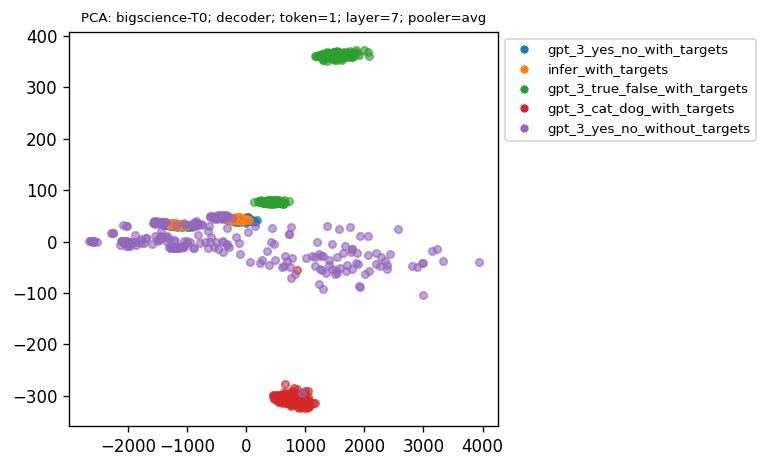



token: 1	layer: 8


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5668.14it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:1; layer:8; n_components: 2; variance explained: [0.92352897 0.02321036]
0.9467393


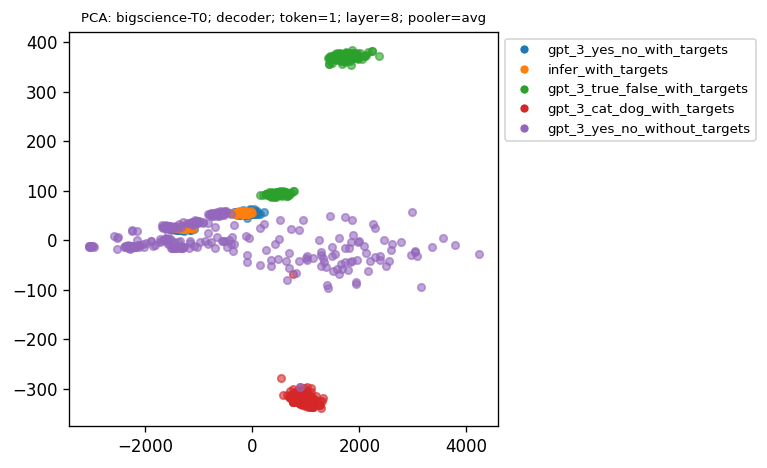



token: 1	layer: 9


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5417.05it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:1; layer:9; n_components: 2; variance explained: [0.9326639  0.02207537]
0.9547393


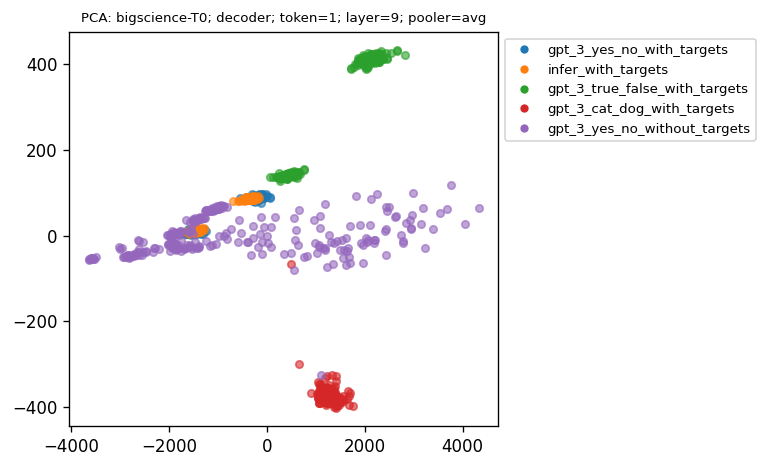



token: 1	layer: 10


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5872.86it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:1; layer:10; n_components: 2; variance explained: [0.93732023 0.02039188]
0.9577121


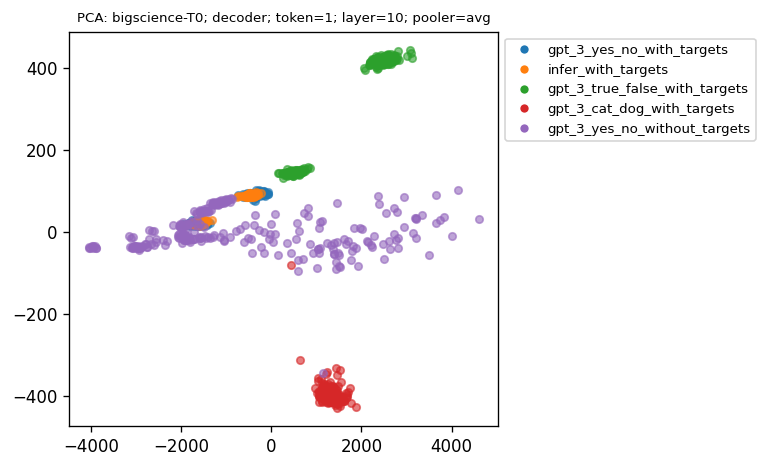



token: 1	layer: 11


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5294.61it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:1; layer:11; n_components: 2; variance explained: [0.9340915  0.02212066]
0.95621216


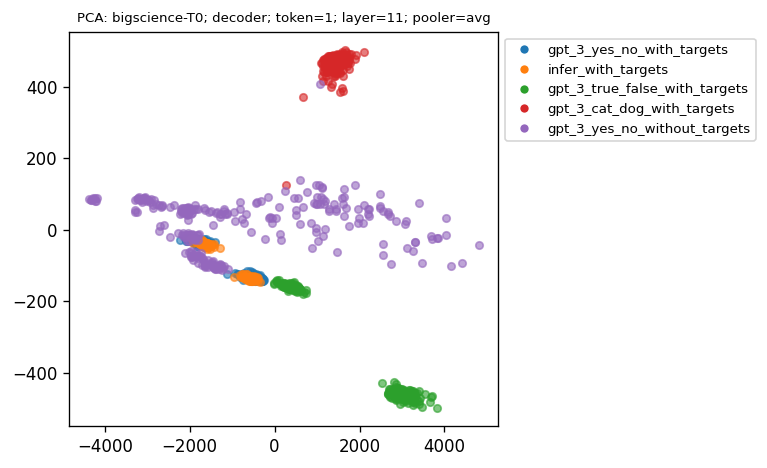



token: 1	layer: 12


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5093.43it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:1; layer:12; n_components: 2; variance explained: [0.9213965 0.0266637]
0.9480602


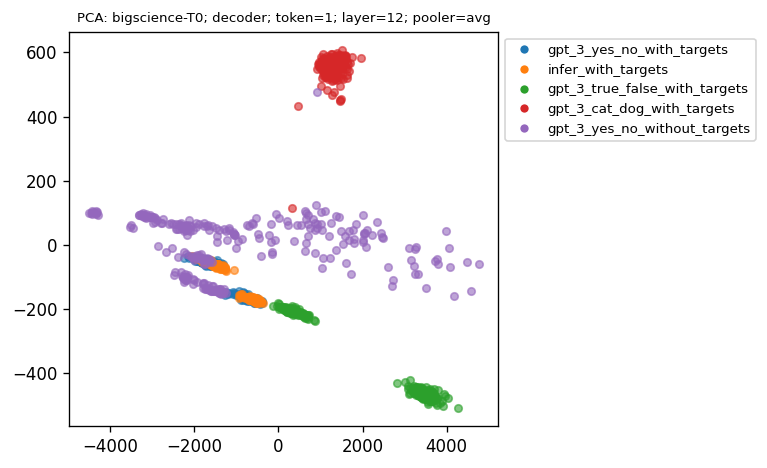



token: 1	layer: 13


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5711.64it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:1; layer:13; n_components: 2; variance explained: [0.8958433  0.03431206]
0.9301554


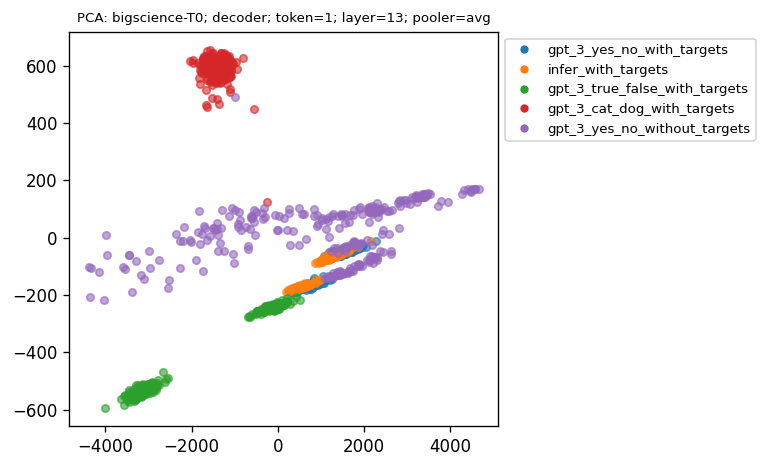



token: 1	layer: 14


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5947.91it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:1; layer:14; n_components: 2; variance explained: [0.88061774 0.03666499]
0.9172827


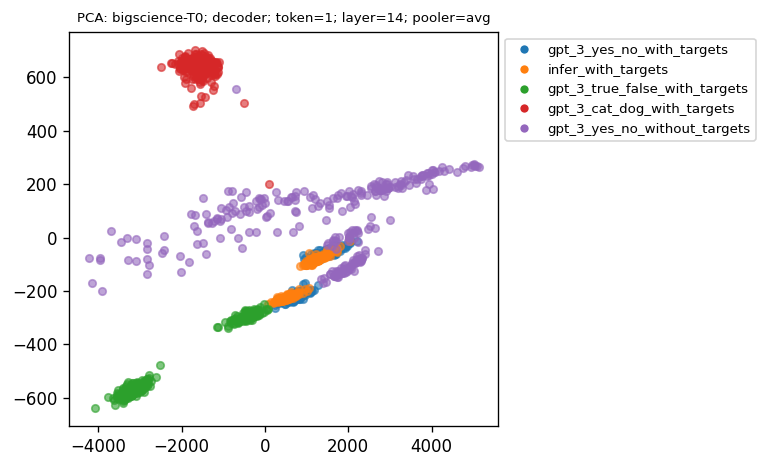



token: 1	layer: 15


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 6036.19it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:1; layer:15; n_components: 2; variance explained: [0.8397912  0.04710301]
0.88689417


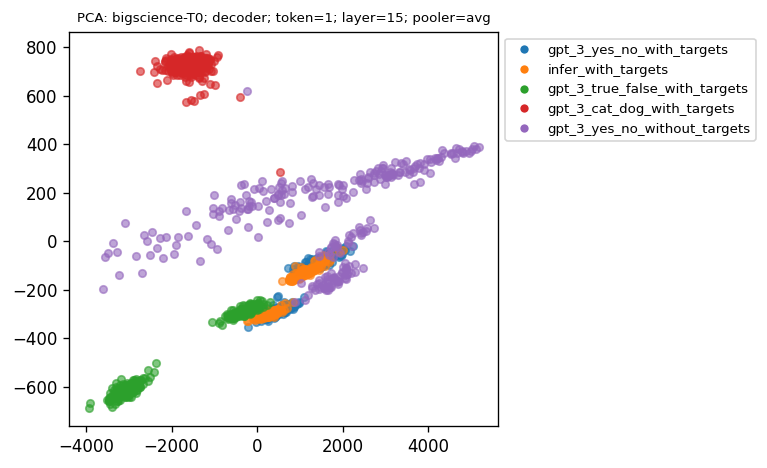



token: 1	layer: 16


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 4988.25it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:1; layer:16; n_components: 2; variance explained: [0.75726247 0.06629396]
0.8235564


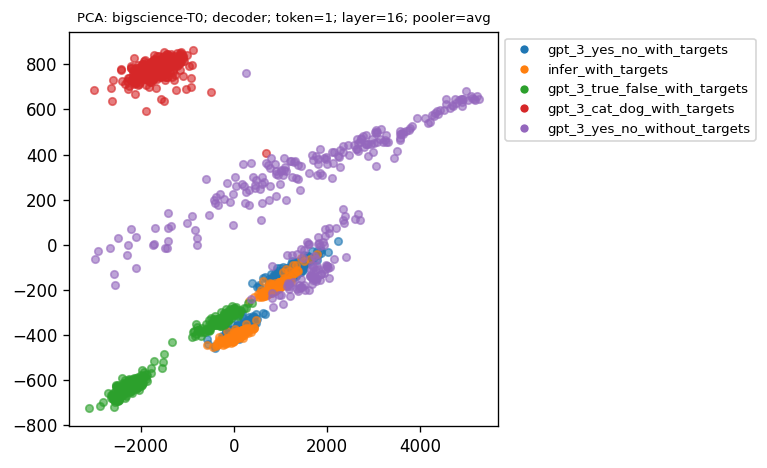



token: 1	layer: 17


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5803.39it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:1; layer:17; n_components: 2; variance explained: [0.63754344 0.09278789]
0.7303313


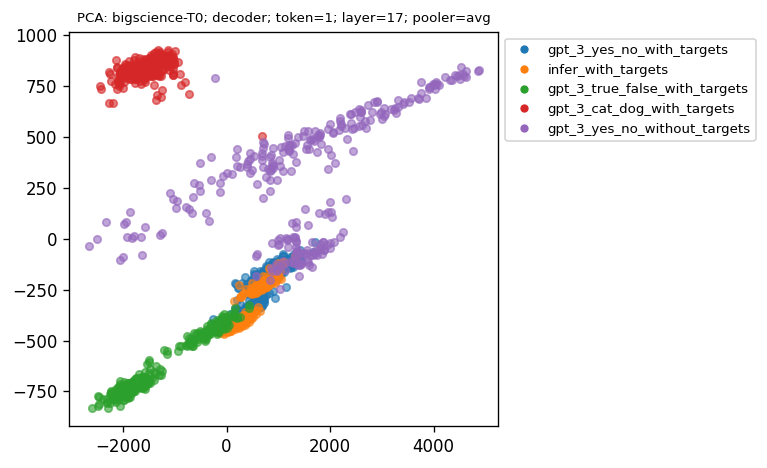



token: 1	layer: 18


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 6001.49it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:1; layer:18; n_components: 2; variance explained: [0.5586798  0.10833529]
0.66701514


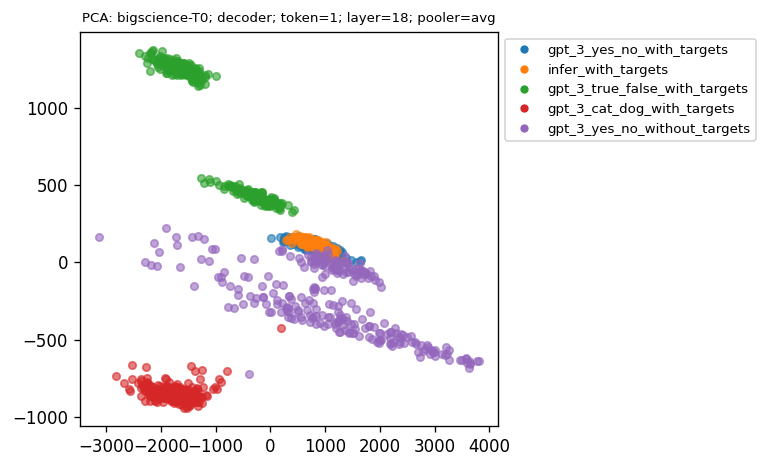



token: 1	layer: 19


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5630.89it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:1; layer:19; n_components: 2; variance explained: [0.5004676 0.115917 ]
0.6163846


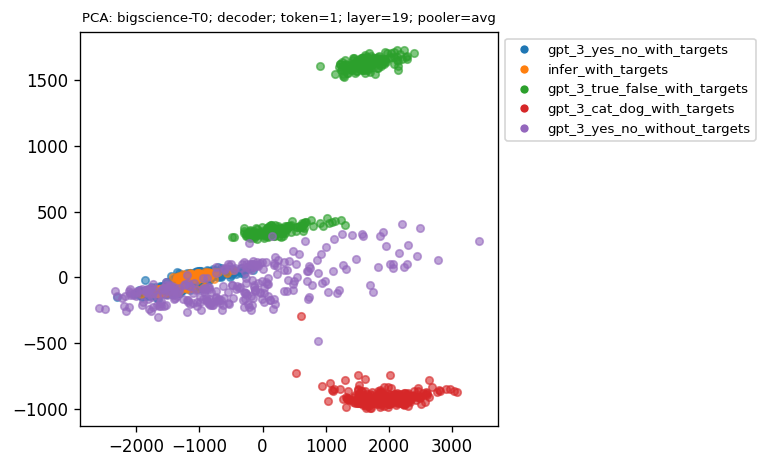



token: 1	layer: 20


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5882.35it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:1; layer:20; n_components: 2; variance explained: [0.5237453  0.10814139]
0.6318867


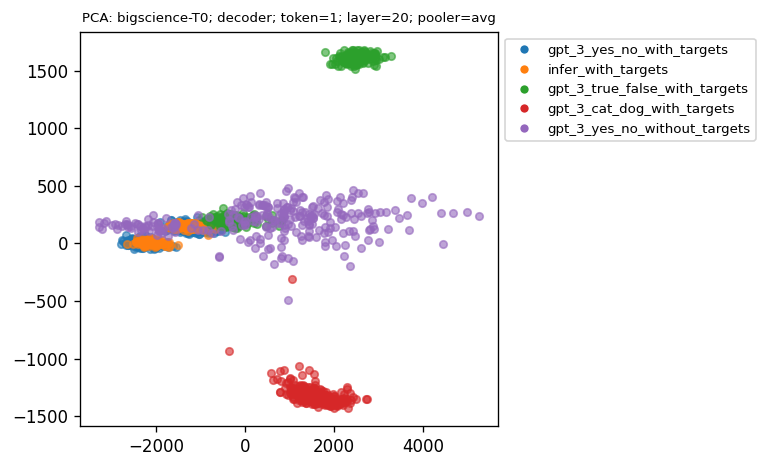



token: 1	layer: 21


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5426.46it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:1; layer:21; n_components: 2; variance explained: [0.47311515 0.10988394]
0.5829991


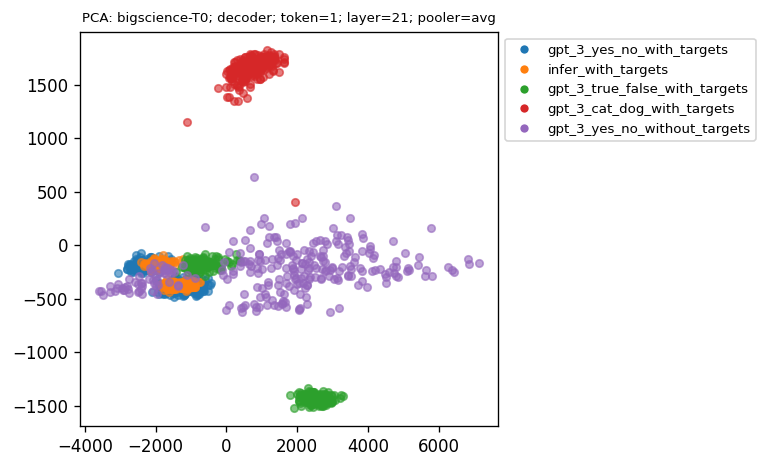



token: 1	layer: 22


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5761.06it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:1; layer:22; n_components: 2; variance explained: [0.2549694  0.18129826]
0.43626764


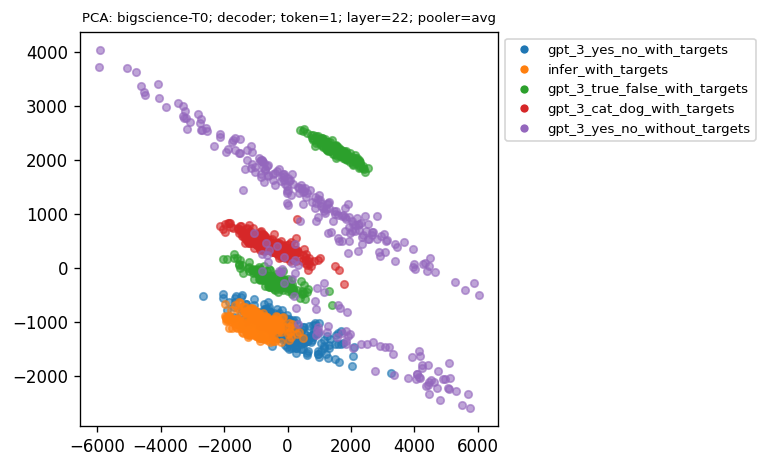



token: 1	layer: 23


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5478.25it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:1; layer:23; n_components: 2; variance explained: [0.43769798 0.134814  ]
0.572512


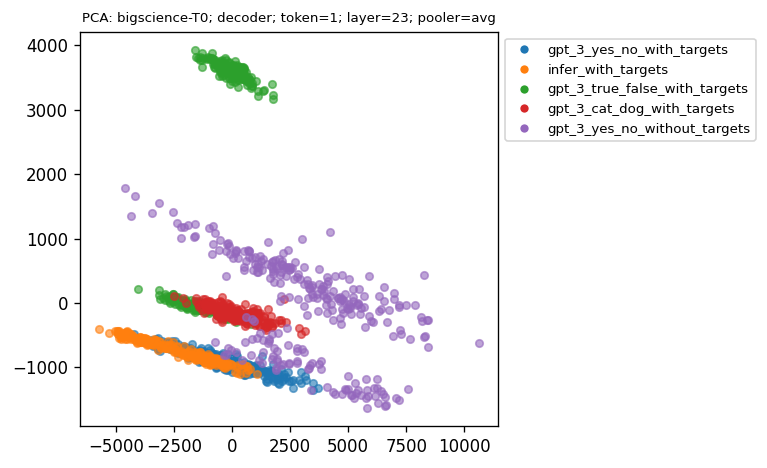



token: 1	layer: 24


Reading embeddings: 100%|██████████| 277/277 [00:00<00:00, 5883.87it/s]


(1385, 4096) (1385,)
PCA for prompts: ['gpt_3_yes_no_with_targets', 'infer_with_targets', 'gpt_3_true_false_with_targets', 'gpt_3_cat_dog_with_targets', 'gpt_3_yes_no_without_targets']
(1385, 2)
model:bigscience-T0; module:decoder; token:1; layer:24; n_components: 2; variance explained: [0.7541592  0.10811506]
0.8622743


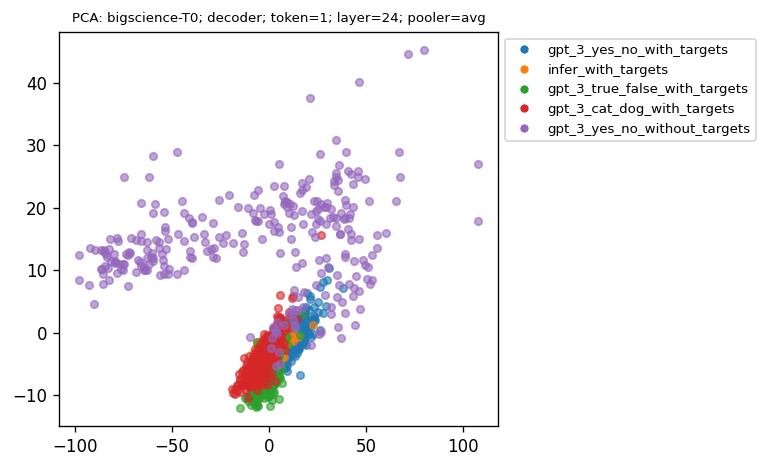

In [11]:
cmap = matplotlib.cm.get_cmap('tab10')
# cmap = matplotlib.cm.get_cmap('tab20')
colors = cmap.colors

for t in range(2):
# for t in range(1):
    # for layer in range(0, 10):
    for layer in range(0, 25):
    # for layer in range(24, 25):
        print(f"token: {t}\tlayer: {layer}")
        file_names, prompt_names = [], []

        for _, row in df.iterrows():
            if row['name'] in use_pattern:
                file_names.append(f"{task}/{model}/{module}/{row['name']}/hidden_represenations_t{t}_layer{layer}_avg.hdf5",)
                prompt_names.append(row['name'])


        # load hidden representations from hdf5 file
        representations = None
        classes = []
        n_sequences = 0

        for idx, file_name in enumerate(file_names):
            hidden_representations = load_hidden_representations_from_hdf5(os.path.join(log_dir, file_name))
            # print(hidden_representations.shape)
            n_sequences = hidden_representations.shape[0]

            if representations is None:
                representations = hidden_representations
            else:
                representations = np.concatenate((representations, hidden_representations), axis=0)

            classes += n_sequences * [idx] # assign representations to classes
        
        classes = np.asarray(classes)

        X, y = representations, classes
        # shuffle representations and classes
        # X, y = unison_shuffled_copies(representations, classes)
        print(X.shape, y.shape)

        # perform PCA on hidden representations
        print('PCA for prompts:', prompt_names)

        for n_components in range(2, 3):
            pca = PCA(n_components=n_components)
            X_pca = pca.fit(X).transform(X)
            print(X_pca.shape)

            # variance explained by each of the principal components
            print(f"model:{model}; module:{module}; token:{t}; layer:{layer}; n_components: {n_components}; variance explained: {pca.explained_variance_ratio_}")
            print(np.sum(pca.explained_variance_ratio_))

            # plot PCA embeddings
            fig, axes = plt.subplots(1, 1, figsize=(6.5,4), dpi=120)
            legend_elements= []

            for idx, file_name in enumerate(file_names):
                x, y = X_pca[n_sequences*idx:n_sequences*(idx + 1), 0], X_pca[n_sequences*idx:n_sequences*(idx + 1), 1]
                axes.scatter(x, y, alpha=0.6, s=[20.0], color=colors[idx])

                # create legend element manually
                legend_elements.append(Line2D([0], [0], marker='o', color='w', label=prompt_names[idx], markerfacecolor=colors[idx], markersize=6))
        
            axes.set_title(f"PCA: {model}; {module}; token={t}; layer={layer}; pooler=avg", fontsize=8)
            axes.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.0, 1.0), fancybox=True, shadow=False, fontsize=8)

            plt.tight_layout()

            plt.show()
            plt.close();
        
        print('\n')
